In [2]:
# import the package we need for cleaning data
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [5]:
#import the data
orignal_df = pd.read_csv('input/data.csv')
orignal_df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [6]:
#check the data size
orignal_df.shape

(251079, 15)

In [7]:
#get the information of data
orignal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [8]:
#check the coloumns
orignal_df.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [9]:
# Drop off the coloumns which we not intereted in
orignal_df = orignal_df.drop(columns=['Unnamed: 0','power_kw', 'fuel_consumption_g_km','offer_description'])

In [10]:
#Check the number for the NA value
orignal_df.isnull().sum()

brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
mileage_in_km                 152
dtype: int64

In [11]:
#dropping less null containing columns
clean_df=orignal_df.dropna(subset=['color','registration_date','power_ps','mileage_in_km'])

In [12]:
## Check the specific coloumn
#start with "fuel_consumption_l_100km"
clean_df['fuel_consumption_l_100km']

0         10,9 l/100 km
1                   NaN
2                   NaN
3          9,5 l/100 km
4          7,2 l/100 km
              ...      
251074              NaN
251075     7,6 l/100 km
251076     4,7 l/100 km
251077              NaN
251078              NaN
Name: fuel_consumption_l_100km, Length: 250635, dtype: object

In [13]:
# Remove the difference unit of this coloumn
substring = "l/100 km"
matches = clean_df['fuel_consumption_l_100km'].str.contains(substring,na=True)
matches.value_counts()

True     249474
False      1161
Name: fuel_consumption_l_100km, dtype: int64

In [14]:
clean_df = clean_df[matches==True]

In [15]:
# Remove the unit and convert the type 
warnings.filterwarnings("ignore")
clean_df.loc[:, 'fuel_consumption_l_100km'] = clean_df['fuel_consumption_l_100km'].str.replace(",", '.')
clean_df.loc[:, 'fuel_consumption_l_100km'] = clean_df['fuel_consumption_l_100km'].replace('- (l/100 km)', np.nan)
clean_df.loc[:, 'fuel_consumption_l_100km'] = clean_df['fuel_consumption_l_100km'].str.replace('l/100 km', '').astype(float)


In [16]:
# Drop the NA value
clean_df=clean_df.dropna(subset=['fuel_consumption_l_100km'])

In [17]:
clean_df['fuel_consumption_l_100km']

0         10.9
3          9.5
4          7.2
5          9.5
6          8.8
          ... 
251071     7.4
251072     5.6
251073     5.6
251075     7.6
251076     4.7
Name: fuel_consumption_l_100km, Length: 221590, dtype: float64

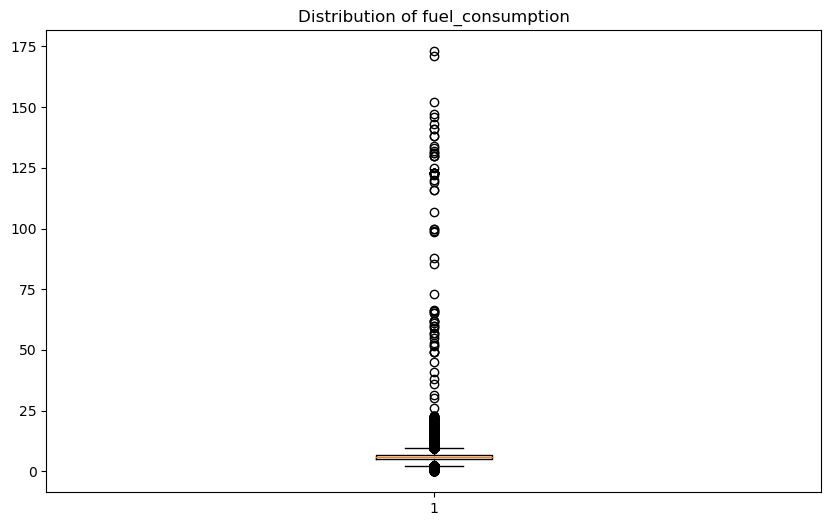

In [19]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(clean_df['fuel_consumption_l_100km'])
plt.title('Distribution of fuel_consumption')
plt.show()

In [42]:
# Convert the price_in_euro and power_ps into numerical value
clean_df.loc[:, 'price_in_euro'] = clean_df['price_in_euro'].astype(int)
clean_df.loc[:, 'power_ps'] = clean_df['power_ps'].astype(int)

In [43]:
clean_df.shape

(221590, 11)

In [44]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221590 entries, 0 to 251076
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     221590 non-null  object 
 1   model                     221590 non-null  object 
 2   color                     221590 non-null  object 
 3   registration_date         221590 non-null  object 
 4   year                      221590 non-null  object 
 5   price_in_euro             221590 non-null  int64  
 6   power_ps                  221590 non-null  int64  
 7   transmission_type         221590 non-null  object 
 8   fuel_type                 221590 non-null  object 
 9   fuel_consumption_l_100km  221590 non-null  float64
 10  mileage_in_km             221590 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 20.3+ MB


In [45]:
# Fillter out the year
print(clean_df['year'].unique())

['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']


In [53]:
clean_df.to_csv('base_clean/base_data.csv')

In [46]:
clean_df_5= clean_df.loc[(clean_df['year'] == "2019")|
                       (clean_df['year'] == "2020")|
                       (clean_df['year'] == "2021") | 
                        (clean_df['year'] == "2022") |
                        (clean_df['year'] == "2023")]

In [47]:
clean_df_5.shape

(88616, 11)

In [48]:
clean_df_5.head()

,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
723,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
724,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
725,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
726,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
727,alfa-romeo,Alfa Romeo Stelvio,blue,05/2019,2019,68900,510,Unknown,Petrol,9.8,7000.0


In [49]:
clean_df_5.to_csv('base_clean/base_5_data.csv')

In [50]:
clean_df_3= clean_df.loc[(clean_df['year'] == "2021") | 
                        (clean_df['year'] == "2022") |
                        (clean_df['year'] == "2023")]

In [51]:
clean_df_3.to_csv('base_clean/base_3_data.csv')